In [11]:
import pandas as pd
import numpy as np
data = pd.read_csv("C:/Users/kamat/Downloads/stress_detection.csv")
print(data.head())

          subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1.0        1527009817             4    9.429737  ...   
2         0.8        1535935605             2    7.769821  ...   
3         0.6        1516429555       

In [12]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kamat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


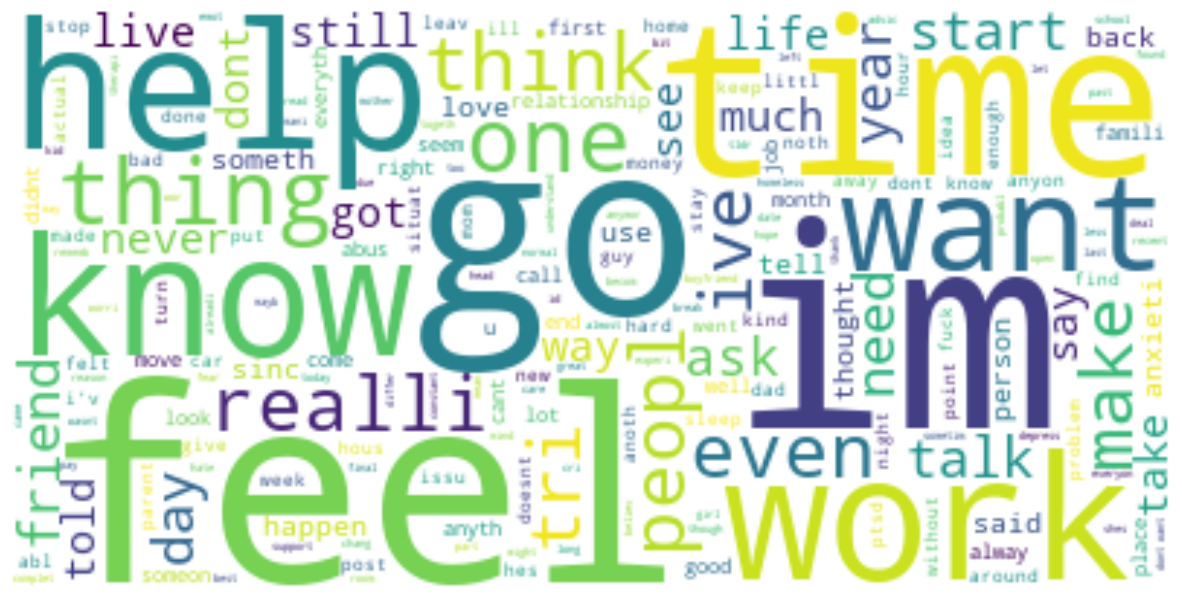

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
data["label"] = data["label"].map({0: "No Stress", 1: "Stress"})
data = data[["text", "label"]]
print(data.head())

                                                text      label
0  said felt way sugget go rest trigger ahead you...     Stress
1  hey rassist sure right place post goe  im curr...  No Stress
2  mom hit newspap shock would know dont like pla...     Stress
3  met new boyfriend amaz kind sweet good student...     Stress
4  octob domest violenc awar month domest violenc...     Stress


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X = np.array(data["text"])
y = np.array(data["label"])
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Total no. of samples: Training and Testing dataset separately!')
print('x_train:', np.shape(x_train))
print('y_train:', np.shape(y_train))
print('x_test:', np.shape(x_test))
print('y_test:', np.shape(y_test))


Total no. of samples: Training and Testing dataset separately!
x_train: (1901,)
y_train: (1901,)
x_test: (937,)
y_test: (937,)


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
cv = CountVectorizer()
x_train = cv.fit_transform(x_train)
x_train = sc.fit_transform(x_train)
x_test = cv.transform(x_test)
x_test = sc.transform(x_test)

In [17]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(x_train, y_train)
y_predict = logistic_model.predict(x_test)

#Comparing between actual and predicted outputs of the testing data
print(np.concatenate((y_predict.reshape(len(y_predict),1), y_test.reshape(len(y_test),1)),1))

[['No Stress' 'No Stress']
 ['No Stress' 'No Stress']
 ['Stress' 'Stress']
 ...
 ['Stress' 'Stress']
 ['No Stress' 'No Stress']
 ['No Stress' 'Stress']]


In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[300 144]
 [136 357]]


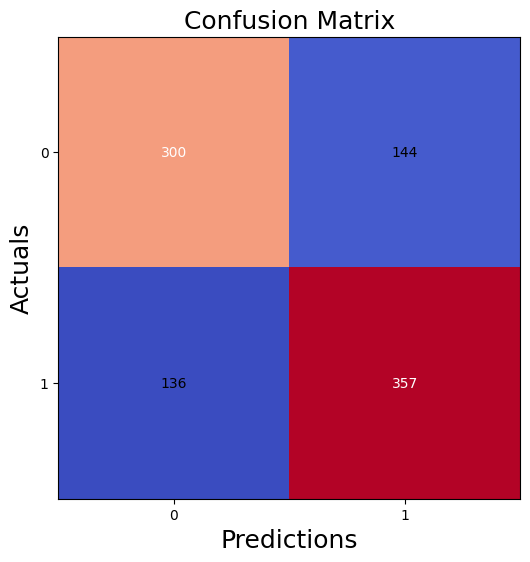

In [19]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.coolwarm)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show() # This gives us a rough idea.

In [20]:

user_input = input("Enter a Text: ")
user_data = cv.transform([user_input]).toarray()
output = logistic_model.predict(user_data)
print(output) 

['No Stress']
